USER INPUT: Set File Locations

In [1]:
## Dropbox directory = working directory
wd = "/Users/meghs/Google Drive/My Drive/Science/model_utilities_data/"
swd = "/Users/meghs/Dropbox/Tropical_Forests_Data_Discovery/"

## Data and figure folders
dd = wd + "AGB_Data/"
sd = swd + 'Spatial_Data/'
od = wd + 'Code/science/Models/'

Files To Be Read In: Note Site here refers to the KMZ polygon of the project site

In [2]:
## Files 
site          = sd + 'Sites/Azuero Reforestation Corridor.kmz'
cwd_layer     = sd + 'CWD/CWD.bil/CWD.bil'
biomass_layer = sd + "Forest_AGB.tif"
model_input   = swd + 'Code/science/Models/LM_CWD_Age_Gamma.pickle'


Import Modules

In [3]:
## General
import os
from datetime import date

## Earthshot Model Utilities
import modelUtilities 
from modelUtilities import Models as md

## Plotting 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as lines

## Get todays date 
today = date.today()
year_now = today.strftime("%Y")

Extract KML from KMZ (Ignore potential warning message about Shapely/PyGEOS incompatibility)

In [4]:
site = md.Load_KMZ(kmz_file_location= sd + "Sites/", kmz_file_name="Azuero Reforestation Corridor.kmz")


/Users/meghs/Dropbox/Tropical_Forests_Data_Discovery/Code/science/modelEnv/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Average CWD Values across the site polygon

In [5]:
cwd_value = md.Zonal_Stats_Raster(Raster_Layer = cwd_layer, Site_KML = site, NODATA = -999)


Optional: Get existing amount of Biomass at site (from 2010 map)

In [6]:
bio_value = md.Zonal_Stats_Raster(Raster_Layer = biomass_layer, Site_KML = site, NODATA = -3.3999999521443642e+38)


Run Linear Regression results from: AGB ~ CWD + Log(Age) against newly predict age data and CWD from our polygon

In [7]:
biomass_results = md.Regression_CWD_logAge(Model_Location = model_input, CWD_Value = cwd_value, Initial_Biomass = False, Bio_Value = 0)


/Users/meghs/Dropbox/Tropical_Forests_Data_Discovery/Code/science/modelEnv/lib/python3.8/site-packages/modelUtilities/Models.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['AGB_Mg_ha'][x_test['AGB_Mg_ha'] < 0] = 0


Plot Results

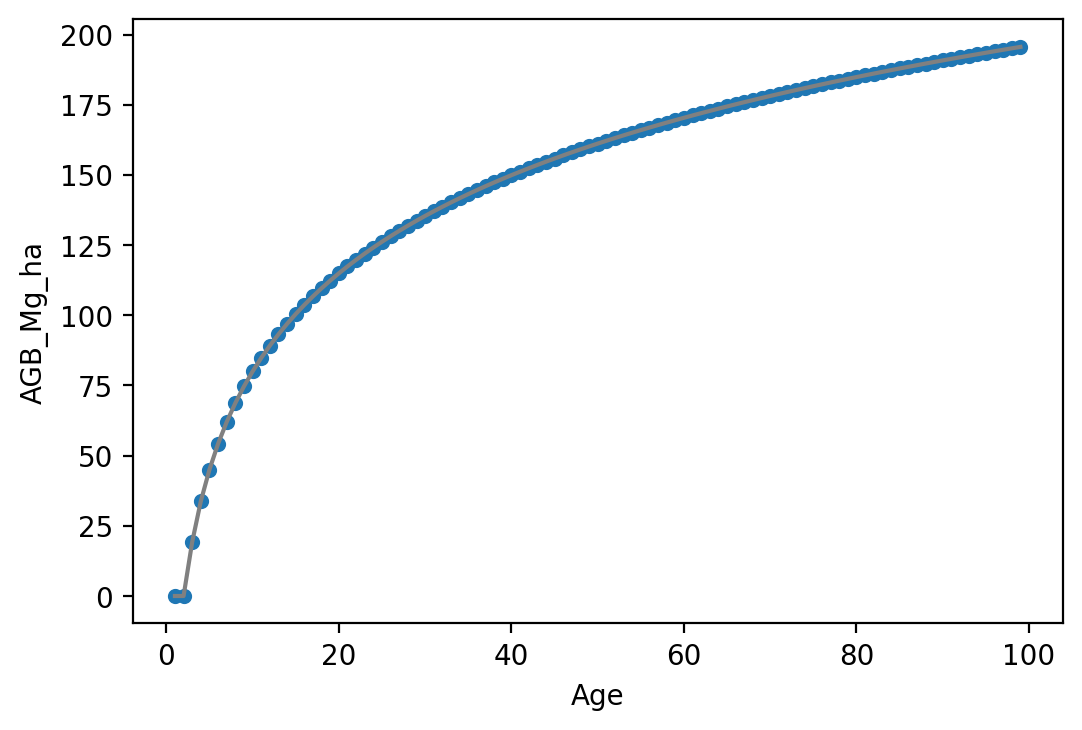

In [8]:
mpl.rcParams['figure.dpi'] = 200 ## Change resolution
fig = biomass_results.plot.scatter(x='Age', y='AGB_Mg_ha')
fig.add_artist(lines.Line2D(biomass_results['Age'], biomass_results['AGB_Mg_ha'], color = "gray"))